In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

### species(8973)

In [2]:
species_index = pd.read_csv('data_intergrate/split_index/species_index.csv',index_col = 0)
species_index

,Protein IDs
0,1433B_HUMAN
1,1433B_MOUSE
2,1433E_HUMAN
3,1433E_MOUSE
4,1433F_HUMAN
...,...
83867,ZW10_HUMAN
83868,ZW10_MOUSE
83869,ZYX_HUMAN
83870,ZYX_MOUSE


In [3]:
species_map = pd.read_excel('map_index/species_map.xlsx')
species_map

C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,From,Entry,Entry Name,Protein names,Gene Names
0,1433B_HUMAN,P31946,1433B_HUMAN,14-3-3 protein beta/alpha (Protein 1054) (Prot...,YWHAB
1,1433B_MOUSE,Q9CQV8,1433B_MOUSE,14-3-3 protein beta/alpha (Protein kinase C in...,Ywhab
2,1433E_HUMAN,P62258,1433E_HUMAN,14-3-3 protein epsilon (14-3-3E),YWHAE
3,1433E_MOUSE,P62259,1433E_MOUSE,14-3-3 protein epsilon (14-3-3E),Ywhae
4,1433F_HUMAN,Q04917,1433F_HUMAN,14-3-3 protein eta (Protein AS1),YWHAH YWHA1
...,...,...,...,...,...
7711,ZW10_HUMAN,O43264,ZW10_HUMAN,Centromere/kinetochore protein zw10 homolog,ZW10
7712,ZW10_MOUSE,O54692,ZW10_MOUSE,Centromere/kinetochore protein zw10 homolog,Zw10
7713,ZYX_HUMAN,Q15942,ZYX_HUMAN,Zyxin (Zyxin-2),ZYX
7714,ZYX_MOUSE,Q62523,ZYX_MOUSE,Zyxin,Zyx


In [4]:
processed_species_index = species_index.merge(species_map, left_on='Protein IDs', right_on='From', how='left')

processed_species_index['Processed Protein IDs'] = processed_species_index['Entry']+'|'+processed_species_index['Entry Name']
columns = ['Protein IDs','Processed Protein IDs']
processed_species_index = processed_species_index[columns]
processed_species_index = processed_species_index.dropna()
processed_species_index.to_csv('data_intergrate/map_result/species_index.csv')

### all_info_index(15025)

In [5]:
all_info_index = pd.read_csv('data_intergrate/split_index/all_info_index.csv',index_col = 0)
all_info_index.to_csv('data_intergrate/map_result/all_info_index.csv')
all_info_index

,Protein IDs,Processed Protein IDs
83873,sp|A0A075B6K5|LV39_HUMAN,A0A075B6K5|LV39_HUMAN
83874,sp|A0A0B4J1V0|HV315_HUMAN,A0A0B4J1V0|HV315_HUMAN
83875,sp|A0A0B4J2F0|PIOS1_HUMAN,A0A0B4J2F0|PIOS1_HUMAN
83876,sp|A0A0B4KGY6-10|NOVA_DROME,A0A0B4KGY6-10|NOVA_DROME
83877,sp|A0A0B5ADT9|INS2A_CONFO,A0A0B5ADT9|INS2A_CONFO
...,...,...
119544,sp|Q9ZMN7|FABI_HELPJ,Q9ZMN7|FABI_HELPJ
119545,sp|Q9ZMV7|TOP1_HELPJ,Q9ZMV7|TOP1_HELPJ
119546,sp|Q9ZMW4|DNAK_HELPJ,Q9ZMW4|DNAK_HELPJ
119547,sp|Q9ZN52|PANC_HELPJ,Q9ZN52|PANC_HELPJ


### long_name_info (6704)

In [6]:
long_name_index = pd.read_csv('data_intergrate/split_index/long_name_index.csv',index_col = 0)
long_name_index

,Protein IDs
88,A0A023T778
89,A0A023T778
90,A0A024QZP7
91,A0A024QZX5
92,A0A024R4E5
...,...
19108,ENSGALP00000043386
19109,ENSGALP00000043400
19110,ENSGALP00000043402
19111,ENSGALP00000043461


In [7]:
long_name_map = pd.read_excel('map_index/long_name_map.xlsx')
long_name_map

C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,From,Entry,Entry Name,Protein names
0,A0A023T778,A0A023T778,A0A023T778_MOUSE,"Mago homolog B, exon junction complex core com..."
1,A0A024QZP7,A0A024QZP7,A0A024QZP7_HUMAN,Cyclin dependent kinase 1
2,A0A024QZX5,A0A024QZX5,A0A024QZX5_HUMAN,Serpin B6
3,A0A024R4E5,A0A024R4E5,A0A024R4E5_HUMAN,High density lipoprotein binding protein
4,A0A024R571,A0A024R571,A0A024R571_HUMAN,EH domain containing 1 (EH-domain containing 1...
...,...,...,...,...
5576,A0A6Q6QAE5,A0A6Q6QAE5,A0A6Q6QAE5_MOUSE,INO80 complex subunit B
5577,A0A6Q6QBZ6,A0A6Q6QBZ6,A0A6Q6QBZ6_MOUSE,Piwi-like RNA-mediated gene silencing 4
5578,A0A6Q6QXN1,A0A6Q6QXN1,A0A6Q6QXN1_MOUSE,ATP-dependent DNA helicase PIF1 (EC 3.6.4.12) ...
5579,A0A7D9N0A8,A0A7D9N0A8,A0A7D9N0A8_MOUSE,deleted


In [8]:
processed_long_name_index = long_name_index.merge(long_name_map, left_on = 'Protein IDs', right_on='From',how='left')
processed_long_name_index['Processed Protein IDs'] = processed_long_name_index['Entry'] + '|' +processed_long_name_index['Entry Name']
columns = ['Protein IDs','Processed Protein IDs']
processed_long_name_index = processed_long_name_index[columns]
processed_long_name_index = processed_long_name_index.fillna('Not Match')
processed_long_name_index.to_csv('data_intergrate/map_result/long_name_index.csv')

### short_name_index(47559)

In [9]:
short_name_index = pd.read_csv('data_intergrate/split_index/short_name_index_isoform.csv',index_col = 0)
short_name_index

,Protein IDs
6203,A0A4W9
6332,A0A5D0
7053,A0AUZ9
7054,A0AV96
7056,A0AVF1
...,...
83769,Z4YNA3
83770,Z4YNA9
83771,Z4YNF4
83772,Z4YNH5


In [10]:
short_name_map = pd.read_excel('map_index/short_name_map.xlsx')
processed_short_name_index = short_name_index.merge(short_name_map,left_on='Protein IDs',right_on='From',how='left')
processed_short_name_index['Processed Protein IDs'] = processed_short_name_index['Entry'] + '|' + processed_short_name_index['Entry Name']
columns = ['Protein IDs','Processed Protein IDs']
processed_short_name_index = processed_short_name_index[columns]
processed_short_name_index.to_csv('data_intergrate/map_result/short_name_index.csv')

### standard_index(4191)

In [11]:
standard_index = pd.read_csv('data_intergrate/split_index/standard_index.csv',index_col = 0)
standard_index['Processed Protein IDs'] = standard_index['Protein IDs']
standard_index.to_csv('data_intergrate/map_result/standard_index.csv')
standard_index

,Protein IDs,Processed Protein IDs
7055,A0AV96|RBM47_HUMAN,A0AV96|RBM47_HUMAN
7063,A0AVT1|UBA6_HUMAN,A0AVT1|UBA6_HUMAN
7066,A0FGR8|ESYT2_HUMAN,A0FGR8|ESYT2_HUMAN
7096,A0PJW6|TM223_HUMAN,A0PJW6|TM223_HUMAN
7131,A1L0T0|ILVBL_HUMAN,A1L0T0|ILVBL_HUMAN
...,...,...
80214,Q9Y6W3|CAN7_HUMAN,Q9Y6W3|CAN7_HUMAN
80217,Q9Y6W5|WASF2_HUMAN,Q9Y6W5|WASF2_HUMAN
80225,Q9Y6X9|MORC2_HUMAN,Q9Y6X9|MORC2_HUMAN
80227,Q9Y6Y0|NS1BP_HUMAN,Q9Y6Y0|NS1BP_HUMAN


### isoform_index(5562)

In [12]:
isoform_index = pd.read_csv('data_intergrate/split_index/isoform_index.csv',index_col = 0)
isoform_index

,Protein IDs
294,A0A087WPF7-2
7065,A0FGR8-2
7085,A0MZ66-3
7086,A0MZ66-3
7087,A0MZ66-3
...,...
80583,Q9Z2Y3-3
80596,Q9Z329-3
80598,Q9Z351-12
80599,Q9Z351-8


In [13]:
isoform_map = pd.read_excel('map_index/isoform_map.xlsx')
processed_isoform_index = isoform_index.merge(isoform_map,left_on='Protein IDs',right_on='From',how='left')
processed_isoform_index['Processed Protein IDs'] = processed_isoform_index['Entry'] + '|' + processed_isoform_index['Entry Name']
columns = ['Protein IDs','Processed Protein IDs']
processed_isoform_index = processed_isoform_index[columns]
processed_isoform_index.to_csv('data_intergrate/map_result/isoform_index.csv')

C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### long_long_name_index(15157)

In [16]:
long_long_name_index = pd.read_csv('data_intergrate/split_index/long_long_name_index.csv',index_col=0)
long_long_name_index['Processed Protein IDs'] = long_long_name_index['Protein IDs'].apply(process_protein_id)
long_long_name_index.to_csv('data_intergrate/map_result/long_long_name_index.csv')
long_long_name_index

,Protein IDs,Processed Protein IDs
83886,sp|A0A183|LCE6A_HUMANLatecornifiedenvelopeprot...,A0A183|LCE6A_HUMAN
83905,sp|A0AUZ9-2|KAL1L_HUMANIsoform2ofKAT8regulator...,A0AUZ9-2|KAL1L_HUMAN
83906,sp|A0AV02-5|S12A8_HUMANIsoform5ofSolutecarrier...,A0AV02-5|S12A8_HUMAN
83909,sp|A0AV96|RBM47_HUMANRNA-bindingprotein47OS=Ho...,A0AV96|RBM47_HUMAN
83910,sp|A0AV96|RBM47_HUMANRNA-bindingprotein47OS=Ho...,A0AV96|RBM47_HUMAN
...,...,...
119457,sp|Q9Y6Y1-3|CMTA1_HUMANIsoform3ofCalmodulin-bi...,Q9Y6Y1-3|CMTA1_HUMAN
119459,sp|Q9Y6Y8-2|S23IP_HUMANIsoform2ofSEC23-interac...,Q9Y6Y8-2|S23IP_HUMAN
119462,sp|Q9Y6Z4|KIAS1_HUMANPutativeuncharacterizedpr...,Q9Y6Z4|KIAS1_HUMAN
119463,sp|Q9Y6Z5-2|MLAS1_HUMANIsoform2ofPutativeuncha...,Q9Y6Z5-2|MLAS1_HUMAN


In [15]:
def process_protein_id(protein_id):
    protein_id = re.sub(r'^(sp|tr)\|', '', protein_id)
    protein_id = re.sub(r'(-[A-Z0-9]{6,}|(_[A-Z0-9]{5}).*$)', r'\2', protein_id)
    return protein_id

### other_index(6679)

In [17]:
def extract_last(protein_id):
    protein_id = str(protein_id)
    return protein_id.split('|')[-1]

In [18]:
other_index = pd.read_csv('data_intergrate/split_index/other_index.csv',index_col=0)
other_index['Processed Protein IDs'] = other_index['Protein IDs'].apply(extract_last)
other_index.to_csv('other_index.csv')
other_index

,Protein IDs,Processed Protein IDs
24146,JGIv7b.000000004:705143-963692_VV|dus2,dus2
24147,JGIv7b.000000222:91604-94565_VV|timm8a,timm8a
24148,JGIv7b.000000226:1391404-1397535_VV|vps72,vps72
24149,JGIv7b.000000226:542804-598606_VV|vangl2,vangl2
24150,JGIv7b.000000226:683897-699589_XV|ncstn,ncstn
...,...,...
30918,JGIv7b.000409144:409111-421094_VV|usp39,usp39
30919,JGIv7b.000409144:459228-466704_VV|rnf181,rnf181
30920,JGIv7b.000409144:558122-565083_VV|mat2a,mat2a
30921,JGIv7b.000409144:558122-565083_VV|mat2a,mat2a


In [19]:
other_map = pd.read_excel('map_index/other_map.xlsx')
processed_other_index = other_index.merge(other_map,left_on='Processed Protein IDs',right_on = 'From',how = 'left')
processed_other_index['Standard Protein IDs'] = processed_other_index['Entry'] + '|' + processed_other_index['Entry Name']
columns = ['Protein IDs','Standard Protein IDs']
processed_other_index = processed_other_index[columns]
processed_other_index = processed_other_index.dropna()
processed_other_index.drop_duplicates(subset = ['Protein IDs'],keep = 'first',inplace = True)
processed_other_index.columns = ['Protein IDs','Processed Protein IDs']
processed_other_index.to_csv('data_intergrate/map_result/other_index.csv')

C:\Users\Lenovo2\miniconda3\envs\SinCellPro\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## all

In [20]:
species_index = pd.read_csv('data_intergrate/map_result/species_index.csv',index_col = 0)
all_info_index = pd.read_csv('data_intergrate/map_result/all_info_index.csv',index_col = 0)
long_name_index = pd.read_csv('data_intergrate/map_result/long_name_index.csv',index_col = 0)
short_name_index = pd.read_csv('data_intergrate/map_result/short_name_index.csv',index_col = 0)
standard_index = pd.read_csv('data_intergrate/map_result/standard_index.csv',index_col = 0)
isoform_index = pd.read_csv('data_intergrate/map_result/isoform_index.csv',index_col = 0)
long_long_name_index = pd.read_csv('data_intergrate/map_result/long_long_name_index.csv',index_col= 0)
other_index = pd.read_csv('data_intergrate/map_result/other_index.csv',index_col = 0)

In [22]:
long_long_name_index

,Protein IDs,Processed Protein IDs
83886,sp|A0A183|LCE6A_HUMANLatecornifiedenvelopeprot...,A0A183|LCE6A_HUMAN
83905,sp|A0AUZ9-2|KAL1L_HUMANIsoform2ofKAT8regulator...,A0AUZ9-2|KAL1L_HUMAN
83906,sp|A0AV02-5|S12A8_HUMANIsoform5ofSolutecarrier...,A0AV02-5|S12A8_HUMAN
83909,sp|A0AV96|RBM47_HUMANRNA-bindingprotein47OS=Ho...,A0AV96|RBM47_HUMAN
83910,sp|A0AV96|RBM47_HUMANRNA-bindingprotein47OS=Ho...,A0AV96|RBM47_HUMAN
...,...,...
119457,sp|Q9Y6Y1-3|CMTA1_HUMANIsoform3ofCalmodulin-bi...,Q9Y6Y1-3|CMTA1_HUMAN
119459,sp|Q9Y6Y8-2|S23IP_HUMANIsoform2ofSEC23-interac...,Q9Y6Y8-2|S23IP_HUMAN
119462,sp|Q9Y6Z4|KIAS1_HUMANPutativeuncharacterizedpr...,Q9Y6Z4|KIAS1_HUMAN
119463,sp|Q9Y6Z5-2|MLAS1_HUMANIsoform2ofPutativeuncha...,Q9Y6Z5-2|MLAS1_HUMAN


### merge the index map

In [21]:
index_map = pd.concat([species_index,all_info_index,long_name_index,short_name_index,standard_index,isoform_index,long_long_name_index,other_index],axis=0)
# index_map.to_csv('map_result/index_map_11.csv')
index_map

,Protein IDs,Processed Protein IDs
0,1433B_HUMAN,P31946|1433B_HUMAN
1,1433B_MOUSE,Q9CQV8|1433B_MOUSE
2,1433E_HUMAN,P62258|1433E_HUMAN
3,1433E_MOUSE,P62259|1433E_MOUSE
4,1433F_HUMAN,Q04917|1433F_HUMAN
...,...,...
12948,JGIv7b.000404817:181138-189851_VV|snrpa1,Q641E8|Q641E8_XENLA
12949,JGIv7b.000404817:444351-474445_VV|clpx,A0A8J0UP05|A0A8J0UP05_XENLA
12951,JGIv7b.000404817:920131-959610_VV|dpp8,A0A8J0UM03|A0A8J0UM03_XENLA
12958,JGIv7b.000409144:459228-466704_VV|rnf181,Q6GPV5|RN181_XENLA


In [22]:
all_data = pd.read_csv('data_intergrate/all_data.csv')
# index_map = pd.read_csv('map_result/index_map.csv')

C:\Users\Lenovo2\AppData\Local\Temp\ipykernel_25512\2047808487.py:1: DtypeWarning: Columns (1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1309,1310,1311,1312,1313,1314,1315,1316,1317) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_csv('data_intergrate/all_data.csv')


In [23]:
all_data_standard = all_data.merge(index_map,left_on='Protein IDs',right_on='Protein IDs',how='left')
all_data_standard

,Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 62,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 63,...,Testis_GC-1_spg_single_SCP68838_Intensity Set45,Testis_GC-1_spg_single_SCP68838_Intensity Set46,Testis_GC-1_spg_single_SCP68838_Intensity Set47,Testis_GC-1_spg_single_SCP68838_Intensity Set48,Testis_GC-1_spg_single_SCP68838_Intensity Set5,Testis_GC-1_spg_single_SCP68838_Intensity Set6,Testis_GC-1_spg_single_SCP68838_Intensity Set7,Testis_GC-1_spg_single_SCP68838_Intensity Set8,Testis_GC-1_spg_single_SCP68838_Intensity Set9,Processed Protein IDs
0,1433B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P31946|1433B_HUMAN
1,1433B_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Q9CQV8|1433B_MOUSE
2,1433E_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P62258|1433E_HUMAN
3,1433E_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P62259|1433E_MOUSE
4,1433F_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Q04917|1433F_HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551419,tr|Q9PUS4|Q9PUS4_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
551420,tr|Q9PW76|Q9PW76_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
551421,tr|Q9ZZM1|Q9ZZM1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
551422,tr|X1WE59|X1WE59_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [24]:
columns = list(all_data_standard.columns)
columns.insert(1, columns.pop(-1))
all_data_standard = all_data_standard[columns]
all_data_standard

,Protein IDs,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 62,...,Testis_GC-1_spg_single_SCP68838_Intensity Set44,Testis_GC-1_spg_single_SCP68838_Intensity Set45,Testis_GC-1_spg_single_SCP68838_Intensity Set46,Testis_GC-1_spg_single_SCP68838_Intensity Set47,Testis_GC-1_spg_single_SCP68838_Intensity Set48,Testis_GC-1_spg_single_SCP68838_Intensity Set5,Testis_GC-1_spg_single_SCP68838_Intensity Set6,Testis_GC-1_spg_single_SCP68838_Intensity Set7,Testis_GC-1_spg_single_SCP68838_Intensity Set8,Testis_GC-1_spg_single_SCP68838_Intensity Set9
0,1433B_HUMAN,P31946|1433B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1433B_MOUSE,Q9CQV8|1433B_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1433E_HUMAN,P62258|1433E_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1433E_MOUSE,P62259|1433E_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1433F_HUMAN,Q04917|1433F_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551419,tr|Q9PUS4|Q9PUS4_DANRE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551420,tr|Q9PW76|Q9PW76_DANRE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551421,tr|Q9ZZM1|Q9ZZM1_XENLA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551422,tr|X1WE59|X1WE59_DANRE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# 删除带有CON的行
all_data_standard = all_data_standard[~all_data_standard['Protein IDs'].str.contains('CON', na=False)]
all_data_standard

,Protein IDs,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 62,...,Testis_GC-1_spg_single_SCP68838_Intensity Set44,Testis_GC-1_spg_single_SCP68838_Intensity Set45,Testis_GC-1_spg_single_SCP68838_Intensity Set46,Testis_GC-1_spg_single_SCP68838_Intensity Set47,Testis_GC-1_spg_single_SCP68838_Intensity Set48,Testis_GC-1_spg_single_SCP68838_Intensity Set5,Testis_GC-1_spg_single_SCP68838_Intensity Set6,Testis_GC-1_spg_single_SCP68838_Intensity Set7,Testis_GC-1_spg_single_SCP68838_Intensity Set8,Testis_GC-1_spg_single_SCP68838_Intensity Set9
0,1433B_HUMAN,P31946|1433B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1433B_MOUSE,Q9CQV8|1433B_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1433E_HUMAN,P62258|1433E_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1433E_MOUSE,P62259|1433E_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1433F_HUMAN,Q04917|1433F_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551419,tr|Q9PUS4|Q9PUS4_DANRE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551420,tr|Q9PW76|Q9PW76_DANRE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551421,tr|Q9ZZM1|Q9ZZM1_XENLA,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
551422,tr|X1WE59|X1WE59_DANRE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# 提取出 还没有map上的行
no_map = all_data_standard[all_data_standard['Processed Protein IDs'].isna()]
# map过后的
mapped_data = all_data_standard[~all_data_standard['Processed Protein IDs'].isna()]

In [27]:
mapped_data

,Protein IDs,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 62,...,Testis_GC-1_spg_single_SCP68838_Intensity Set44,Testis_GC-1_spg_single_SCP68838_Intensity Set45,Testis_GC-1_spg_single_SCP68838_Intensity Set46,Testis_GC-1_spg_single_SCP68838_Intensity Set47,Testis_GC-1_spg_single_SCP68838_Intensity Set48,Testis_GC-1_spg_single_SCP68838_Intensity Set5,Testis_GC-1_spg_single_SCP68838_Intensity Set6,Testis_GC-1_spg_single_SCP68838_Intensity Set7,Testis_GC-1_spg_single_SCP68838_Intensity Set8,Testis_GC-1_spg_single_SCP68838_Intensity Set9
0,1433B_HUMAN,P31946|1433B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1433B_MOUSE,Q9CQV8|1433B_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1433E_HUMAN,P62258|1433E_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1433E_MOUSE,P62259|1433E_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1433F_HUMAN,Q04917|1433F_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550849,sp|Q9ZMN7|FABI_HELPJ,Q9ZMN7|FABI_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550850,sp|Q9ZMV7|TOP1_HELPJ,Q9ZMV7|TOP1_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550851,sp|Q9ZMW4|DNAK_HELPJ,Q9ZMW4|DNAK_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550852,sp|Q9ZN52|PANC_HELPJ,Q9ZN52|PANC_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
mapped_data.to_csv('data_intergrate/mapped.csv')
no_map.to_csv('data_intergrate/no_map.csv')

KeyboardInterrupt: 

In [29]:

mapped_data

,Protein IDs,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 62,...,Testis_GC-1_spg_single_SCP68838_Intensity Set44,Testis_GC-1_spg_single_SCP68838_Intensity Set45,Testis_GC-1_spg_single_SCP68838_Intensity Set46,Testis_GC-1_spg_single_SCP68838_Intensity Set47,Testis_GC-1_spg_single_SCP68838_Intensity Set48,Testis_GC-1_spg_single_SCP68838_Intensity Set5,Testis_GC-1_spg_single_SCP68838_Intensity Set6,Testis_GC-1_spg_single_SCP68838_Intensity Set7,Testis_GC-1_spg_single_SCP68838_Intensity Set8,Testis_GC-1_spg_single_SCP68838_Intensity Set9
0,1433B_HUMAN,P31946|1433B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1433B_MOUSE,Q9CQV8|1433B_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1433E_HUMAN,P62258|1433E_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1433E_MOUSE,P62259|1433E_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1433F_HUMAN,Q04917|1433F_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550849,sp|Q9ZMN7|FABI_HELPJ,Q9ZMN7|FABI_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550850,sp|Q9ZMV7|TOP1_HELPJ,Q9ZMV7|TOP1_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550851,sp|Q9ZMW4|DNAK_HELPJ,Q9ZMW4|DNAK_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550852,sp|Q9ZN52|PANC_HELPJ,Q9ZN52|PANC_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
JGI = mapped_data[mapped_data['Protein IDs'].str.contains('JGIv7b')]
JGI

,Protein IDs,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 62,...,Testis_GC-1_spg_single_SCP68838_Intensity Set44,Testis_GC-1_spg_single_SCP68838_Intensity Set45,Testis_GC-1_spg_single_SCP68838_Intensity Set46,Testis_GC-1_spg_single_SCP68838_Intensity Set47,Testis_GC-1_spg_single_SCP68838_Intensity Set48,Testis_GC-1_spg_single_SCP68838_Intensity Set5,Testis_GC-1_spg_single_SCP68838_Intensity Set6,Testis_GC-1_spg_single_SCP68838_Intensity Set7,Testis_GC-1_spg_single_SCP68838_Intensity Set8,Testis_GC-1_spg_single_SCP68838_Intensity Set9
192441,JGIv7b.000000222:91604-94565_VV|timm8a,Q66L32|TIM8A_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192442,JGIv7b.000000226:1391404-1397535_VV|vps72,Q6GNJ8|VPS72_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192446,JGIv7b.000000226:698548-733189_VV|copa,A0A8J0TIC5|A0A8J0TIC5_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192447,JGIv7b.000000226:698548-733189_VV|copa,A0A8J0TIC5|A0A8J0TIC5_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192448,JGIv7b.000000243:2713296-2720636_VV|mgc81153,Q6NU84|Q6NU84_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199208,JGIv7b.000404817:444351-474445_VV|clpx,A0A8J0UP05|A0A8J0UP05_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199209,JGIv7b.000404817:920131-959610_VV|dpp8,A0A8J0UM03|A0A8J0UM03_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199213,JGIv7b.000409144:459228-466704_VV|rnf181,Q6GPV5|RN181_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199214,JGIv7b.000409144:558122-565083_VV|mat2a,Q7ZY54|Q7ZY54_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
unique_count = mapped_data['Processed Protein IDs'].nunique()
unique_count

61644

### 去除重复蛋白质行

In [33]:
mapped_data

,Protein IDs,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_SCP46620_Intensity 62,...,Testis_GC-1_spg_single_SCP68838_Intensity Set44,Testis_GC-1_spg_single_SCP68838_Intensity Set45,Testis_GC-1_spg_single_SCP68838_Intensity Set46,Testis_GC-1_spg_single_SCP68838_Intensity Set47,Testis_GC-1_spg_single_SCP68838_Intensity Set48,Testis_GC-1_spg_single_SCP68838_Intensity Set5,Testis_GC-1_spg_single_SCP68838_Intensity Set6,Testis_GC-1_spg_single_SCP68838_Intensity Set7,Testis_GC-1_spg_single_SCP68838_Intensity Set8,Testis_GC-1_spg_single_SCP68838_Intensity Set9
0,1433B_HUMAN,P31946|1433B_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1433B_MOUSE,Q9CQV8|1433B_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1433E_HUMAN,P62258|1433E_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1433E_MOUSE,P62259|1433E_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1433F_HUMAN,Q04917|1433F_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550849,sp|Q9ZMN7|FABI_HELPJ,Q9ZMN7|FABI_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550850,sp|Q9ZMV7|TOP1_HELPJ,Q9ZMV7|TOP1_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550851,sp|Q9ZMW4|DNAK_HELPJ,Q9ZMW4|DNAK_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550852,sp|Q9ZN52|PANC_HELPJ,Q9ZN52|PANC_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# 0不参与计算 
mapped_data[mapped_data.columns.difference(['Protein IDs', 'Processed Protein IDs'])] = \
    mapped_data[mapped_data.columns.difference(['Protein IDs', 'Processed Protein IDs'])].applymap(lambda x: pd.to_numeric(x, errors='coerce'))
group_data = mapped_data.groupby(['Protein IDs', 'Processed Protein IDs']).mean().reset_index()
group_data

C:\Users\Lenovo2\AppData\Local\Temp\ipykernel_25512\1349548011.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data[mapped_data.columns.difference(['Protein IDs', 'Processed Protein IDs'])].applymap(lambda x: pd.to_numeric(x, errors='coerce'))


MemoryError: Unable to allocate 5.85 GiB for an array with shape (1439, 545287) and data type float64

In [36]:
group_data = group_data.drop(columns = ['Protein IDs'])
group_data = group_data.groupby(['Processed Protein IDs']).mean().reset_index()
group_data

C:\Users\Lenovo2\AppData\Local\Temp\ipykernel_23648\2206646376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapped_data.replace('0', np.nan, inplace=True)


TypeError: agg function failed [how->mean,dtype->object]

In [27]:
group_data.to_csv('data/all_exp_matrix.csv')

In [49]:
group_data = pd.read_csv('data/all_exp_matrix.csv',index_col=0)
group_data = group_data.set_index('Processed Protein IDs')
group_data = group_data.fillna(0)

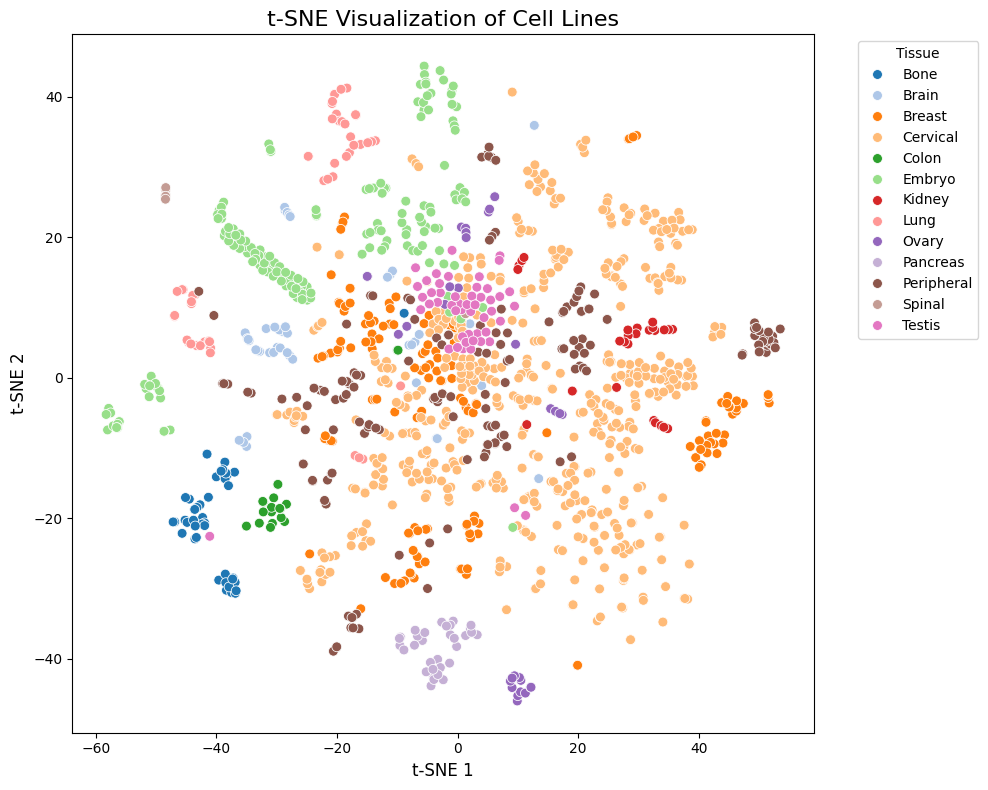

In [58]:
index = group_data.T.index
Tissue=[]
cell_name = index
cell_name = list(cell_name)
for cell in cell_name:
    tissue = cell.split('_')[0]
    Tissue.append(tissue)

group_data_T = group_data.T
scaler = StandardScaler()
group_data_T = scaler.fit_transform(group_data_T)

# 进行 t-SNE 降维
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # perplexity 可以调整
X_tsne = tsne.fit_transform(group_data_T)

tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"])
tsne_df["Tissue"] = Tissue


plt.figure(figsize=(10, 8))
sns.scatterplot(x="tSNE1", y="tSNE2", hue="Tissue", palette="tab20", data=tsne_df, s=50)

plt.title("t-SNE Visualization of Cell Lines", fontsize=16)
plt.xlabel("t-SNE 1", fontsize=12)
plt.ylabel("t-SNE 2", fontsize=12)
plt.legend(title="Tissue", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

### split the exp_matrix by species

In [53]:
data = pd.read_csv('data/all_exp_matrix.csv',index_col = 0)
# data.set_index('Processed Protein IDs',inplace = True)
data = data.fillna(0)

In [54]:
data = data[data.index != 'Not Match']
# data.reset_index()
data

,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_Intensity,Bone_marrow_Macrophage_Primary_BMDM_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_Intensity 62,Bone_marrow_Macrophage_Primary_BMDM_Intensity 63,...,Testis_GC-1_spg_single_Intensity Set44,Testis_GC-1_spg_single_Intensity Set45,Testis_GC-1_spg_single_Intensity Set46,Testis_GC-1_spg_single_Intensity Set47,Testis_GC-1_spg_single_Intensity Set48,Testis_GC-1_spg_single_Intensity Set5,Testis_GC-1_spg_single_Intensity Set6,Testis_GC-1_spg_single_Intensity Set7,Testis_GC-1_spg_single_Intensity Set8,Testis_GC-1_spg_single_Intensity Set9
0,A0A023T778|A0A023T778_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2781500.0,2428900.0,9972800.0,4841200.0,6387400.0,4330400.0,2812700.0,5562800.0,2594100.0,3448700.0
1,A0A024QZP7|A0A024QZP7_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0A024QZX5|A0A024QZX5_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A0A024R4E5|A0A024R4E5_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A0A024R571|A0A024R571_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60487,Z4YNA3|Z4YNA3_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1671300.0,0.0,0.0,0.0,0.0,0.0,0.0,860910.0,0.0
60488,Z4YNA9|Z4YNA9_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60489,Z4YNF4|Z4YNF4_RAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60490,Z4YNH5|Z4YNH5_RAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
def filter_by_species(df, species):
    return df[df['Processed Protein IDs'].str.contains(f'_{species}$', na=False)]

# 分别筛选出每个物种的数据
mouse_df = filter_by_species(data, 'MOUSE')
human_df = filter_by_species(data, 'HUMAN')
rat_df = filter_by_species(data, 'RAT')
xenla_df = filter_by_species(data, 'XENLA')
chick_df = filter_by_species(data, 'CHICK')

In [39]:
information = pd.read_csv('data/information.csv',index_col=0)
species = information['Species']
species.unique()

array(['Mus musculus (Mouse)', 'Homo sapiens (Human)',
       'Rattus norvegicus (Rat)', 'Xenopus laevis (African clawed frog)',
       'Gallus gallus (Chicken)'], dtype=object)

In [61]:
mouse_df = mouse_df.loc[:, (mouse_df != 0).any(axis=0)]
mouse_df

,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_Intensity,Bone_marrow_Macrophage_Primary_BMDM_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_Intensity 62,Bone_marrow_Macrophage_Primary_BMDM_Intensity 63,...,Testis_GC-1_spg_single_Intensity Set44,Testis_GC-1_spg_single_Intensity Set45,Testis_GC-1_spg_single_Intensity Set46,Testis_GC-1_spg_single_Intensity Set47,Testis_GC-1_spg_single_Intensity Set48,Testis_GC-1_spg_single_Intensity Set5,Testis_GC-1_spg_single_Intensity Set6,Testis_GC-1_spg_single_Intensity Set7,Testis_GC-1_spg_single_Intensity Set8,Testis_GC-1_spg_single_Intensity Set9
0,A0A023T778|A0A023T778_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2781500.0,2428900.0,9972800.0,4841200.0,6387400.0,4330400.0,2812700.0,5562800.0,2594100.0,3448700.0
8,A0A067XG46|A0A067XG46_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,45994000.0,23431000.0,0.0,25694000.0,0.0,0.0
9,A0A067XG49|A0A067XG49_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2667600.0
13,A0A075B5I0|A0A075B5I0_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,A0A075B5I2|A0A075B5I2_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60484,Z4YMV4|Z4YMV4_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60485,Z4YN57|Z4YN57_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3649200.0,0.0,0.0,0.0
60486,Z4YN62|Z4YN62_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17389000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60487,Z4YNA3|Z4YNA3_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1671300.0,0.0,0.0,0.0,0.0,0.0,0.0,860910.0,0.0


In [62]:
human_df = human_df.loc[:,(human_df != 0).any(axis=0)]
human_df

,Processed Protein IDs,Brain_U87_0_1_u37cell_Intensity,Brain_U87_0_1_u37cell_Intensity 0cell191115_2,Brain_U87_0_1_u37cell_Intensity 0cell191115_3,Brain_U87_0_1_u37cell_Intensity 0cell191115_5,Brain_U87_0_1_u37cell_Intensity 1cell191201_1,Brain_U87_0_1_u37cell_Intensity 1cell191201_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_3,Breast_Primary_tumour_cell_LungMet_Primary_Intensity,Breast_Primary_tumour_cell_LungMet_Primary_Intensity L1,...,Peripheral_blood_Jurkat_SQC98_Intensity,Peripheral_blood_Jurkat_SQC99_Intensity,Peripheral_blood_Jurkat_FP18_Intensity,Peripheral_blood_Jurkat_IFN6H_Intensity,"Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F7: Sample, Inter, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F8: Sample, Inter, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F9: Sample, Inter, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F10: Sample, Motor, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F11: Sample, Motor, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F12: Sample, Motor, 1_Intensity"
1,A0A024QZP7|A0A024QZP7_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0A024QZX5|A0A024QZX5_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A0A024R4E5|A0A024R4E5_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A0A024R571|A0A024R571_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A0A024R7W5|A0A024R7W5_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,X6RFN3|X6RFN3_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60424,X6RGJ2|X6RGJ2_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60425,X6RLT1|X6RLT1_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60426,X6RM00|X6RM00_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
rat_df = rat_df.loc[:,(rat_df != 0).any(axis=0)]
rat_df

,Processed Protein IDs,Brain_U87_0_1_u37cell_Intensity,Brain_U87_0_1_u37cell_Intensity 0cell191115_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_1,Brain_U87_0_1_u37cell_Intensity 1cell191201_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_3,Brain_Brain_cell_MaxQuant_ProteinGroups_Intensity,Brain_Brain_cell_MaxQuant_ProteinGroups_Intensity 100um_1_082217Prep,Brain_Brain_cell_MaxQuant_ProteinGroups_Intensity 100um_2_082217Prep,Brain_Brain_cell_MaxQuant_ProteinGroups_Intensity 100um_3_082217Prep,...,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0100,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0101,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0102,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0103,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0104,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0105,Peripheral_blood_Jurkat_FIG1_Intensity,Peripheral_blood_Jurkat_FIG1_Intensity 1__161006A_NC_set%2337A_250ms_N3_LC2_exclusionOld,Peripheral_blood_Jurkat_FIG1_Intensity 2__170211LMRSAM00095_set47B_120min,Peripheral_blood_Jurkat_FIG1_Intensity 3__170303LMRSAM00093_NC_set%2350H_120min_50ms
563,A0A096MIS3|A0A096MIS3_RAT,0.0,0.0,0.0,0.0,0.0,763090.0,0.0,20020.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,A0A096MIT7|A0A096MIT7_RAT,0.0,0.0,0.0,0.0,0.0,1531500.0,0.0,52099.0,8581.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,A0A096MIX1|A0A096MIX1_RAT,0.0,0.0,0.0,0.0,0.0,1807900.0,0.0,85912.0,61684.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,A0A096MIZ1|A0A096MIZ1_RAT,0.0,0.0,0.0,0.0,0.0,7901900.0,190330.0,234250.0,288410.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,A0A096MJ24|A0A096MJ24_RAT,0.0,0.0,0.0,0.0,0.0,3433900.0,0.0,78586.0,50686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60082,R9PXW6|R9PXW6_RAT,0.0,0.0,0.0,0.0,0.0,2781600.0,0.0,52475.0,40085.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60418,X1WI37|X1WI37_RAT,0.0,0.0,0.0,0.0,0.0,25510000.0,561530.0,979310.0,551970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60489,Z4YNF4|Z4YNF4_RAT,0.0,0.0,0.0,0.0,0.0,2448400.0,21725.0,49505.0,41619.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60490,Z4YNH5|Z4YNH5_RAT,0.0,0.0,0.0,0.0,0.0,2431400.0,0.0,0.0,36910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
xenla_df = xenla_df.loc[:,(xenla_df != 0).any(axis=0)]
xenla_df

,Processed Protein IDs,Breast_MCF10A_MCF10A_1_3_10_50cell_Intensity,Cervical_HeLa_TMT_HELAHEK_Intensity,Cervical_HeLa_TMT_HELAHEK_Intensity 8_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT20x_HelaHEK_40p60nl100nlTMT_03,Cervical_HeLa_TMT_HELAHEK_Intensity 8_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT20x_HelaHEK_40p60nl100nlTMT_04,Cervical_HeLa_TMT_HELAHEK_Intensity 8_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT20x_HelaHEK_40p60nl100nlTMT_06,Cervical_HeLa_TMT_HELAHEK_Intensity 9_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT_HelaHEK_40p60nl100nlTMT_01,Cervical_HeLa_TMT_HELAHEK_Intensity 9_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT_HelaHEK_40p60nl100nlTMT_02,Cervical_HeLa_TMT_HELAHEK_Intensity 9_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT_HelaHEK_40p60nl100nlTMT_03,Cervical_HeLa_TMT_HELAHEK_Intensity 9_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT_HelaHEK_40p60nl100nlTMT_04,...,Kidney_Kindney_cell_DDM2_Intensity 1,Kidney_Kindney_cell_DDM2_Intensity 2,Kidney_Kindney_cell_DDM2_Intensity 3,Kidney_Kindney_cell_DDM2_Intensity 4,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 4_MK_ES_E1200_precol_scMS_500ms_8227_P5_S4,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 4_MK_ES_E1200_precol_scMS_500ms_8227_P5_S5,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 5_MK_ES_E1200_precol_scMS_500ms_8227_P5_S13,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 5_MK_ES_E1200_precol_scMS_500ms_8227_P5_S17,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 6_MK_ES_E1200_precol_scMS_500ms_8227_P5_S21
7,A0A060CNQ6|A0A060CNQ6_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,A0A068BIF9|A0A068BIF9_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,A0A068ER06|A0A068ER06_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,A0A090AX62|A0A090AX62_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,A0A090AZM4|A0A090AZM4_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59762,Q9YHU0|CTBP1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59763,Q9YHY6|CND1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59764,Q9YHZ6|CDC45_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60061,Q9ZZM1|Q9ZZM1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
chick_df = chick_df.loc[:,(chick_df != 0).any(axis=0)]
chick_df

,Processed Protein IDs,Brain_U87_0_1_u37cell_Intensity,Brain_U87_0_1_u37cell_Intensity 0cell191115_2,Brain_U87_0_1_u37cell_Intensity 0cell191115_3,Brain_U87_0_1_u37cell_Intensity 0cell191115_5,Brain_U87_0_1_u37cell_Intensity 1cell191201_1,Brain_U87_0_1_u37cell_Intensity 1cell191201_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_3,Breast_MCF10A_MCF10A_1_3_10_50cell_Intensity,Cervical_HeLa_TMT_HELAHEK_Intensity,...,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0100,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0101,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0102,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0103,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0104,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0105,Peripheral_blood_Jurkat_FIG1_Intensity,Peripheral_blood_Jurkat_FIG1_Intensity 1__161006A_NC_set%2337A_250ms_N3_LC2_exclusionOld,Peripheral_blood_Jurkat_FIG1_Intensity 2__170211LMRSAM00095_set47B_120min,Peripheral_blood_Jurkat_FIG1_Intensity 3__170303LMRSAM00093_NC_set%2350H_120min_50ms
18466,O13016|PTN1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,4000400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19137,O42265|PSA1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21174,P00698|LYSC_CHICK,1.194600e+09,944200000.0,19005000.0,33683000.0,129160000.0,28051000.0,40524000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21674,P05081|KAD1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1175900.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21967,P07751|SPTN1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22917,P12276|FAS_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27867,P62846|RS15_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28546,P87498|VIT1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26333000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35834,Q5ZLW3|DYM_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48542,Q90694|CDC42_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
mouse_df.to_csv('data/mouse.csv')
human_df.to_csv('data/human.csv')
rat_df.to_csv('data/rat.csv')
xenla_df.to_csv('data/xenla.csv')
chick_df.to_csv('data/chick.csv')

In [ ]:
not_target_species_df = data[
    ~data['Processed Protein IDs'].str.contains(
        r'_(MOUSE|HUMAN|RAT|XENLA|CHICK)$', na=False
    )
]
not_target_species_df = not_target_species_df.loc[:,(not_target_species_df != 0).any(axis=0)]
not_target_species_df.to_csv('data/not_target_species.csv')

In [4]:
mouse_df = pd.read_csv('data/mouse.csv',index_col = 0)
human_df = pd.read_csv('data/human.csv',index_col = 0)
rat_df = pd.read_csv('data/rat.csv',index_col = 0)
xenla_df = pd.read_csv('data/xenla.csv',index_col = 0)
chick_df = pd.read_csv('data/chick.csv',index_col = 0)
not_target_species_df = pd.read_csv('data/not_target_species.csv',index_col = 0)

In [5]:
mouse_df

,Processed Protein IDs,Bone_marrow_Macrophage_Primary_BMDM_Intensity,Bone_marrow_Macrophage_Primary_BMDM_Intensity 56,Bone_marrow_Macrophage_Primary_BMDM_Intensity 57,Bone_marrow_Macrophage_Primary_BMDM_Intensity 58,Bone_marrow_Macrophage_Primary_BMDM_Intensity 59,Bone_marrow_Macrophage_Primary_BMDM_Intensity 60,Bone_marrow_Macrophage_Primary_BMDM_Intensity 61,Bone_marrow_Macrophage_Primary_BMDM_Intensity 62,Bone_marrow_Macrophage_Primary_BMDM_Intensity 63,...,Testis_GC-1_spg_single_Intensity Set44,Testis_GC-1_spg_single_Intensity Set45,Testis_GC-1_spg_single_Intensity Set46,Testis_GC-1_spg_single_Intensity Set47,Testis_GC-1_spg_single_Intensity Set48,Testis_GC-1_spg_single_Intensity Set5,Testis_GC-1_spg_single_Intensity Set6,Testis_GC-1_spg_single_Intensity Set7,Testis_GC-1_spg_single_Intensity Set8,Testis_GC-1_spg_single_Intensity Set9
0,A0A023T778|A0A023T778_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2781500.0,2428900.0,9972800.0,4841200.0,6387400.0,4330400.0,2812700.0,5562800.0,2594100.0,3448700.0
8,A0A067XG46|A0A067XG46_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,45994000.0,23431000.0,0.0,25694000.0,0.0,0.0
9,A0A067XG49|A0A067XG49_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2667600.0
13,A0A075B5I0|A0A075B5I0_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,A0A075B5I2|A0A075B5I2_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60484,Z4YMV4|Z4YMV4_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60485,Z4YN57|Z4YN57_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3649200.0,0.0,0.0,0.0
60486,Z4YN62|Z4YN62_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17389000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60487,Z4YNA3|Z4YNA3_MOUSE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1671300.0,0.0,0.0,0.0,0.0,0.0,0.0,860910.0,0.0


In [6]:
human_df

,Processed Protein IDs,Brain_U87_0_1_u37cell_Intensity,Brain_U87_0_1_u37cell_Intensity 0cell191115_2,Brain_U87_0_1_u37cell_Intensity 0cell191115_3,Brain_U87_0_1_u37cell_Intensity 0cell191115_5,Brain_U87_0_1_u37cell_Intensity 1cell191201_1,Brain_U87_0_1_u37cell_Intensity 1cell191201_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_3,Breast_Primary_tumour_cell_LungMet_Primary_Intensity,Breast_Primary_tumour_cell_LungMet_Primary_Intensity L1,...,Peripheral_blood_Jurkat_SQC98_Intensity,Peripheral_blood_Jurkat_SQC99_Intensity,Peripheral_blood_Jurkat_FP18_Intensity,Peripheral_blood_Jurkat_IFN6H_Intensity,"Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F7: Sample, Inter, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F8: Sample, Inter, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F9: Sample, Inter, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F10: Sample, Motor, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F11: Sample, Motor, 1_Intensity","Spinal_cord_Motor_neurons_(MNs)_inter_motor_Abundance: F12: Sample, Motor, 1_Intensity"
1,A0A024QZP7|A0A024QZP7_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A0A024QZX5|A0A024QZX5_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A0A024R4E5|A0A024R4E5_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A0A024R571|A0A024R571_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A0A024R7W5|A0A024R7W5_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,X6RFN3|X6RFN3_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60424,X6RGJ2|X6RGJ2_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60425,X6RLT1|X6RLT1_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60426,X6RM00|X6RM00_HUMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
rat_df

,Processed Protein IDs,Brain_U87_0_1_u37cell_Intensity,Brain_U87_0_1_u37cell_Intensity 0cell191115_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_1,Brain_U87_0_1_u37cell_Intensity 1cell191201_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_3,Brain_Brain_cell_MaxQuant_ProteinGroups_Intensity,Brain_Brain_cell_MaxQuant_ProteinGroups_Intensity 100um_1_082217Prep,Brain_Brain_cell_MaxQuant_ProteinGroups_Intensity 100um_2_082217Prep,Brain_Brain_cell_MaxQuant_ProteinGroups_Intensity 100um_3_082217Prep,...,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0100,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0101,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0102,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0103,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0104,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0105,Peripheral_blood_Jurkat_FIG1_Intensity,Peripheral_blood_Jurkat_FIG1_Intensity 1__161006A_NC_set%2337A_250ms_N3_LC2_exclusionOld,Peripheral_blood_Jurkat_FIG1_Intensity 2__170211LMRSAM00095_set47B_120min,Peripheral_blood_Jurkat_FIG1_Intensity 3__170303LMRSAM00093_NC_set%2350H_120min_50ms
563,A0A096MIS3|A0A096MIS3_RAT,0.0,0.0,0.0,0.0,0.0,763090.0,0.0,20020.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,A0A096MIT7|A0A096MIT7_RAT,0.0,0.0,0.0,0.0,0.0,1531500.0,0.0,52099.0,8581.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,A0A096MIX1|A0A096MIX1_RAT,0.0,0.0,0.0,0.0,0.0,1807900.0,0.0,85912.0,61684.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,A0A096MIZ1|A0A096MIZ1_RAT,0.0,0.0,0.0,0.0,0.0,7901900.0,190330.0,234250.0,288410.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,A0A096MJ24|A0A096MJ24_RAT,0.0,0.0,0.0,0.0,0.0,3433900.0,0.0,78586.0,50686.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60082,R9PXW6|R9PXW6_RAT,0.0,0.0,0.0,0.0,0.0,2781600.0,0.0,52475.0,40085.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60418,X1WI37|X1WI37_RAT,0.0,0.0,0.0,0.0,0.0,25510000.0,561530.0,979310.0,551970.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60489,Z4YNF4|Z4YNF4_RAT,0.0,0.0,0.0,0.0,0.0,2448400.0,21725.0,49505.0,41619.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60490,Z4YNH5|Z4YNH5_RAT,0.0,0.0,0.0,0.0,0.0,2431400.0,0.0,0.0,36910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
xenla_df

,Processed Protein IDs,Breast_MCF10A_MCF10A_1_3_10_50cell_Intensity,Cervical_HeLa_TMT_HELAHEK_Intensity,Cervical_HeLa_TMT_HELAHEK_Intensity 8_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT20x_HelaHEK_40p60nl100nlTMT_03,Cervical_HeLa_TMT_HELAHEK_Intensity 8_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT20x_HelaHEK_40p60nl100nlTMT_04,Cervical_HeLa_TMT_HELAHEK_Intensity 8_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT20x_HelaHEK_40p60nl100nlTMT_06,Cervical_HeLa_TMT_HELAHEK_Intensity 9_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT_HelaHEK_40p60nl100nlTMT_01,Cervical_HeLa_TMT_HELAHEK_Intensity 9_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT_HelaHEK_40p60nl100nlTMT_02,Cervical_HeLa_TMT_HELAHEK_Intensity 9_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT_HelaHEK_40p60nl100nlTMT_03,Cervical_HeLa_TMT_HELAHEK_Intensity 9_E0_FAIMS_RSLC9_Waters_PepMapPrecol_5ulloop_TMT_HelaHEK_40p60nl100nlTMT_04,...,Kidney_Kindney_cell_DDM2_Intensity 1,Kidney_Kindney_cell_DDM2_Intensity 2,Kidney_Kindney_cell_DDM2_Intensity 3,Kidney_Kindney_cell_DDM2_Intensity 4,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 4_MK_ES_E1200_precol_scMS_500ms_8227_P5_S4,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 4_MK_ES_E1200_precol_scMS_500ms_8227_P5_S5,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 5_MK_ES_E1200_precol_scMS_500ms_8227_P5_S13,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 5_MK_ES_E1200_precol_scMS_500ms_8227_P5_S17,Peripheral_blood_Leukemic_stem_cells_500MS_single_cell_Intensity 6_MK_ES_E1200_precol_scMS_500ms_8227_P5_S21
7,A0A060CNQ6|A0A060CNQ6_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,A0A068BIF9|A0A068BIF9_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,A0A068ER06|A0A068ER06_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555,A0A090AX62|A0A090AX62_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,A0A090AZM4|A0A090AZM4_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59762,Q9YHU0|CTBP1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59763,Q9YHY6|CND1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59764,Q9YHZ6|CDC45_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60061,Q9ZZM1|Q9ZZM1_XENLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
chick_df

,Processed Protein IDs,Brain_U87_0_1_u37cell_Intensity,Brain_U87_0_1_u37cell_Intensity 0cell191115_2,Brain_U87_0_1_u37cell_Intensity 0cell191115_3,Brain_U87_0_1_u37cell_Intensity 0cell191115_5,Brain_U87_0_1_u37cell_Intensity 1cell191201_1,Brain_U87_0_1_u37cell_Intensity 1cell191201_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_3,Breast_MCF10A_MCF10A_1_3_10_50cell_Intensity,Cervical_HeLa_TMT_HELAHEK_Intensity,...,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0100,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0101,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0102,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0103,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0104,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0105,Peripheral_blood_Jurkat_FIG1_Intensity,Peripheral_blood_Jurkat_FIG1_Intensity 1__161006A_NC_set%2337A_250ms_N3_LC2_exclusionOld,Peripheral_blood_Jurkat_FIG1_Intensity 2__170211LMRSAM00095_set47B_120min,Peripheral_blood_Jurkat_FIG1_Intensity 3__170303LMRSAM00093_NC_set%2350H_120min_50ms
18466,O13016|PTN1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,4000400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19137,O42265|PSA1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21174,P00698|LYSC_CHICK,1.194600e+09,944200000.0,19005000.0,33683000.0,129160000.0,28051000.0,40524000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21674,P05081|KAD1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1175900.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21967,P07751|SPTN1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22917,P12276|FAS_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27867,P62846|RS15_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28546,P87498|VIT1_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26333000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35834,Q5ZLW3|DYM_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48542,Q90694|CDC42_CHICK,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
not_target_species_df

,Processed Protein IDs,Brain_U87_0_1_u37cell_Intensity,Brain_U87_0_1_u37cell_Intensity 0cell191115_2,Brain_U87_0_1_u37cell_Intensity 0cell191115_3,Brain_U87_0_1_u37cell_Intensity 0cell191115_5,Brain_U87_0_1_u37cell_Intensity 1cell191201_1,Brain_U87_0_1_u37cell_Intensity 1cell191201_2,Brain_U87_0_1_u37cell_Intensity 1cell191201_3,Breast_MCF10A_MCF10A_1_3_10_50cell_Intensity,Cervical_HeLa_TMT_HELAHEK_Intensity,...,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0103,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0104,Peripheral_blood_U-937_Carrier_level_AGC_Intensity 0105,Peripheral_blood_U-937_Max_Fill_time_Intensity,Peripheral_blood_Jurkat_FIG1_Intensity,Peripheral_blood_Jurkat_FIG1_Intensity 1__161006A_NC_set%2337A_250ms_N3_LC2_exclusionOld,Peripheral_blood_Jurkat_FIG1_Intensity 2__170211LMRSAM00095_set47B_120min,Peripheral_blood_Jurkat_FIG1_Intensity 3__170303LMRSAM00093_NC_set%2350H_120min_50ms,Peripheral_blood_Jurkat_SQC87_Intensity,Peripheral_blood_Jurkat_SQC96_Intensity
1007,A0A0F6PK88|A0A0F6PK88_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1686,A0A0H2UKQ7|A0A0H2UKQ7_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2042,A0A0R4IA30|A0A0R4IA30_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2043,A0A0R4IBE3|A0A0R4IBE3_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2044,A0A0R4IBP7|A0A0R4IBP7_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60058,Q9ZMW4|DNAK_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60059,Q9ZN52|PANC_HELPJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60060,Q9ZU07|C71BC_ARATH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60414,X1WE59|X1WE59_DANRE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
